问题背景
“超级引擎”是一家专门生产汽车引擎的公司，根据政府发布的新排放要求，引擎排放平均值要低于20ppm， （ppm是英文百万分之一的缩写，这里我们只要理解为是按照环保要求汽车尾气中碳氢化合物要低于20ppm）。

公司制造出10台引擎供测试使用，每一台的排放水平如下：

15.6 16.2 22.5 20.5 16.4 19.4 16.6 17.9 12.7 13.9

怎么知道，公司生产的引擎是否符合政府规定呢？

如果你是这家公司的数据分析师，该怎么办呢？

一、描述统计分析
我们开展调查研究并计算统计结果时，我们会在报告的第一部分进行描述统计分析，例如平均值和标准差。

描述统计量是研究的核心。告诉我们研究中发生的情况，应该始终报告出来。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataSer=pd.Series([15.6,16.2,22.5,20.5,16.4,19.4,16.6,17.9,12.7,13.9])

In [3]:
#计算样本均值和标准差
sample_mean=dataSer.mean()
sample_std=dataSer.std()

In [4]:
print('样本平均值是：',sample_mean,'单位：ppm')
print('样本标准差是：',sample_std,'单位：ppm')

样本平均值是： 17.169999999999998 单位：ppm
样本标准差是： 2.9814426038413018 单位：ppm


In [5]:
# 数据分布的类型

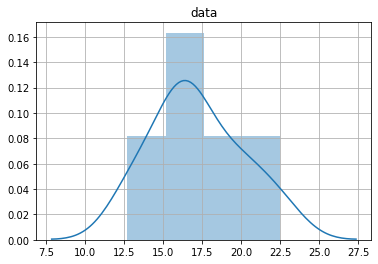

In [8]:
import seaborn as sns

sns.distplot(dataSer)
plt.title('data')
plt.grid(True)
plt.show()

数据集近似正态分布，满足t分布的使用条件，所以可以认为抽样分布是自由度df=9（10-1）的t分布

检验方向

本检验考虑的是是否小于20ppm，固应属于单尾检验中的左尾检验。

2.证据是什么？

在零假设成立的前提下，得到样本平均值的概率p是多少？ 计算p值的步骤如下：

1）计算出标准误差

标准误差=样本标准差除以样本大小n的开方。这里的样本标准差是用来估计总体标准差的

2）计算出t值

t=（样本平均值-总体平均值）/标准误差

3）根据t值，查找t表格，得到概率p值

方法一：手动计算

In [9]:
#样本大小
n=10
#标准误差=样本标准差/(n的开方)
se =sample_std/(np.sqrt(n))

计算t值
t=（样本均值-总体均值）/标准误差

In [12]:
#总体均值：这里可以认为是政府发布的标准20
pop_mean=20

#t计算
t=(sample_mean-20)/se

In [13]:
se,t

(0.9428149341201592, -3.001649525885985)

方法二：用python统计包scipy自动计算

用scipy计算出的是：双尾检验
单（1samp）样本t检验（ttest_1samp）：https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html
相关（related）样本t检验（ttest_rel）：https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html
双独立（independent）样本t检验（ttest_ind）：https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [ ]:
from scipy import stats

In [14]:
pop_mean=20 #总体均值为20

ttest_1samp：单独样本t检验,

返回的第1个值t是假设检验计算出的（t值）,

第2个值p是双尾检验的p值

In [15]:
t,p_twoTail =stats.ttest_1samp(dataSer,pop_mean)

print('t值=',t,'双尾检验的p值=',p_twoTail) 

t值= -3.001649525885985 双尾检验的p值= 0.014916414248897527


直接用scipy计算出的是双尾检验的t值和p值，但是这里是左尾检验。

根据对称性，双尾的p值是单尾的2倍

In [16]:
p_oneTail=p_twoTail / 2

In [25]:
'单尾检验的p值=',p_oneTail

('单尾检验的p值=', 0.0074582071244487635)

3.判断标准是什么？

In [26]:
#判断标准（显著水平）使用alpha=5%
alpha=0.05

4.做出结论

左尾判断条件：t < 0 and p < 判断标准（显著水平）alpha

右尾判断条件：t > 0 and p < 判断标准（显著水平）alpha

In [27]:
if(t < 0 and p_oneTail < alpha): 
    #左尾判断条件
    print('拒绝零假设，有统计显著，也就是汽车引擎排放满足标准')
else: 
    print('接受零假设，没有统计显著，也就是汽车引擎排放不满足标准')

拒绝零假设，有统计显著，也就是汽车引擎排放满足标准


5.置信区间

1）置信水平对应的 t 值（t_ci）

    查t表格可以得到，95%的置信水平，自由度是n-1对应的t值

    （查的自由度为9时的双边t=2.262）
 
 2）计算上下限
 
    置信区间上限a=样本平均值 - t_ci ×标准误差

    置信区间下限b=样本平均值 - t_ci ×标准误差
 
 

In [28]:
t_ci=2.262

In [33]:
#使用scipy计算标准误差
se=stats.sem(dataSer)

In [34]:
a=sample_mean-t_ci*se
b=sample_mean+t_ci*se

In [35]:
print('单个平均值的置信区间，95置信水平 CI=(%f,%f)' % (a,b))

单个平均值的置信区间，95置信水平 CI=(15.037353,19.302647)


6.效应量

    一般需要在报告中给出效应量（effect size）。
    
    什么是效应量呢？
    
    效应量是指处理效应的大小，例如药物A比药物B效果显著。度量效应量有很多种，但大多数都属于两大主要类别。
    
    1）第一种叫做差异度量
    例如在对比平均值时，衡量效应大小的常见标准之一是Cohen's d
    
    Cohen's d = （样本平均值1-样本平均值2) / 标准差

    Cohen's d 除以的是标准差，也就是以标准差为单位，样本平均值和总体平均值之间相差多少。
    
    2）第二种叫做相关度度量

    例如R平方，表示某个变量的变化比例与另一变量的关系。可以用t检验的信息推出R平方的公式，这里的t值从t检验中获得的值，df是自由度。
    
    r2=t2 / (t2+df),其中r2是指r的平方，t2是t的平方
    
    如果r平方等于20%，表示我们可以说通过知道另一个变量能够接受相关变量20%的变化情况
    

效应量：差异指标Cohen's d

In [31]:
d=(sample_mean - pop_mean) / sample_std

效应量：相关度指标R2

In [32]:
#样本大小
n=10
#自由度
df=n-1
R2=(t*t)/(t*t+df)

print('d=',d)
print('R2=',R2)

d= -0.9492049239364257
R2= 0.5002748453994631
